###**Report**

####Performance Visualization: Portfolio vs. Hedged Portfolio (vs. GD.AT &  FTSE ATHEX Large Cap)

[*********************100%***********************]  1 of 1 completed


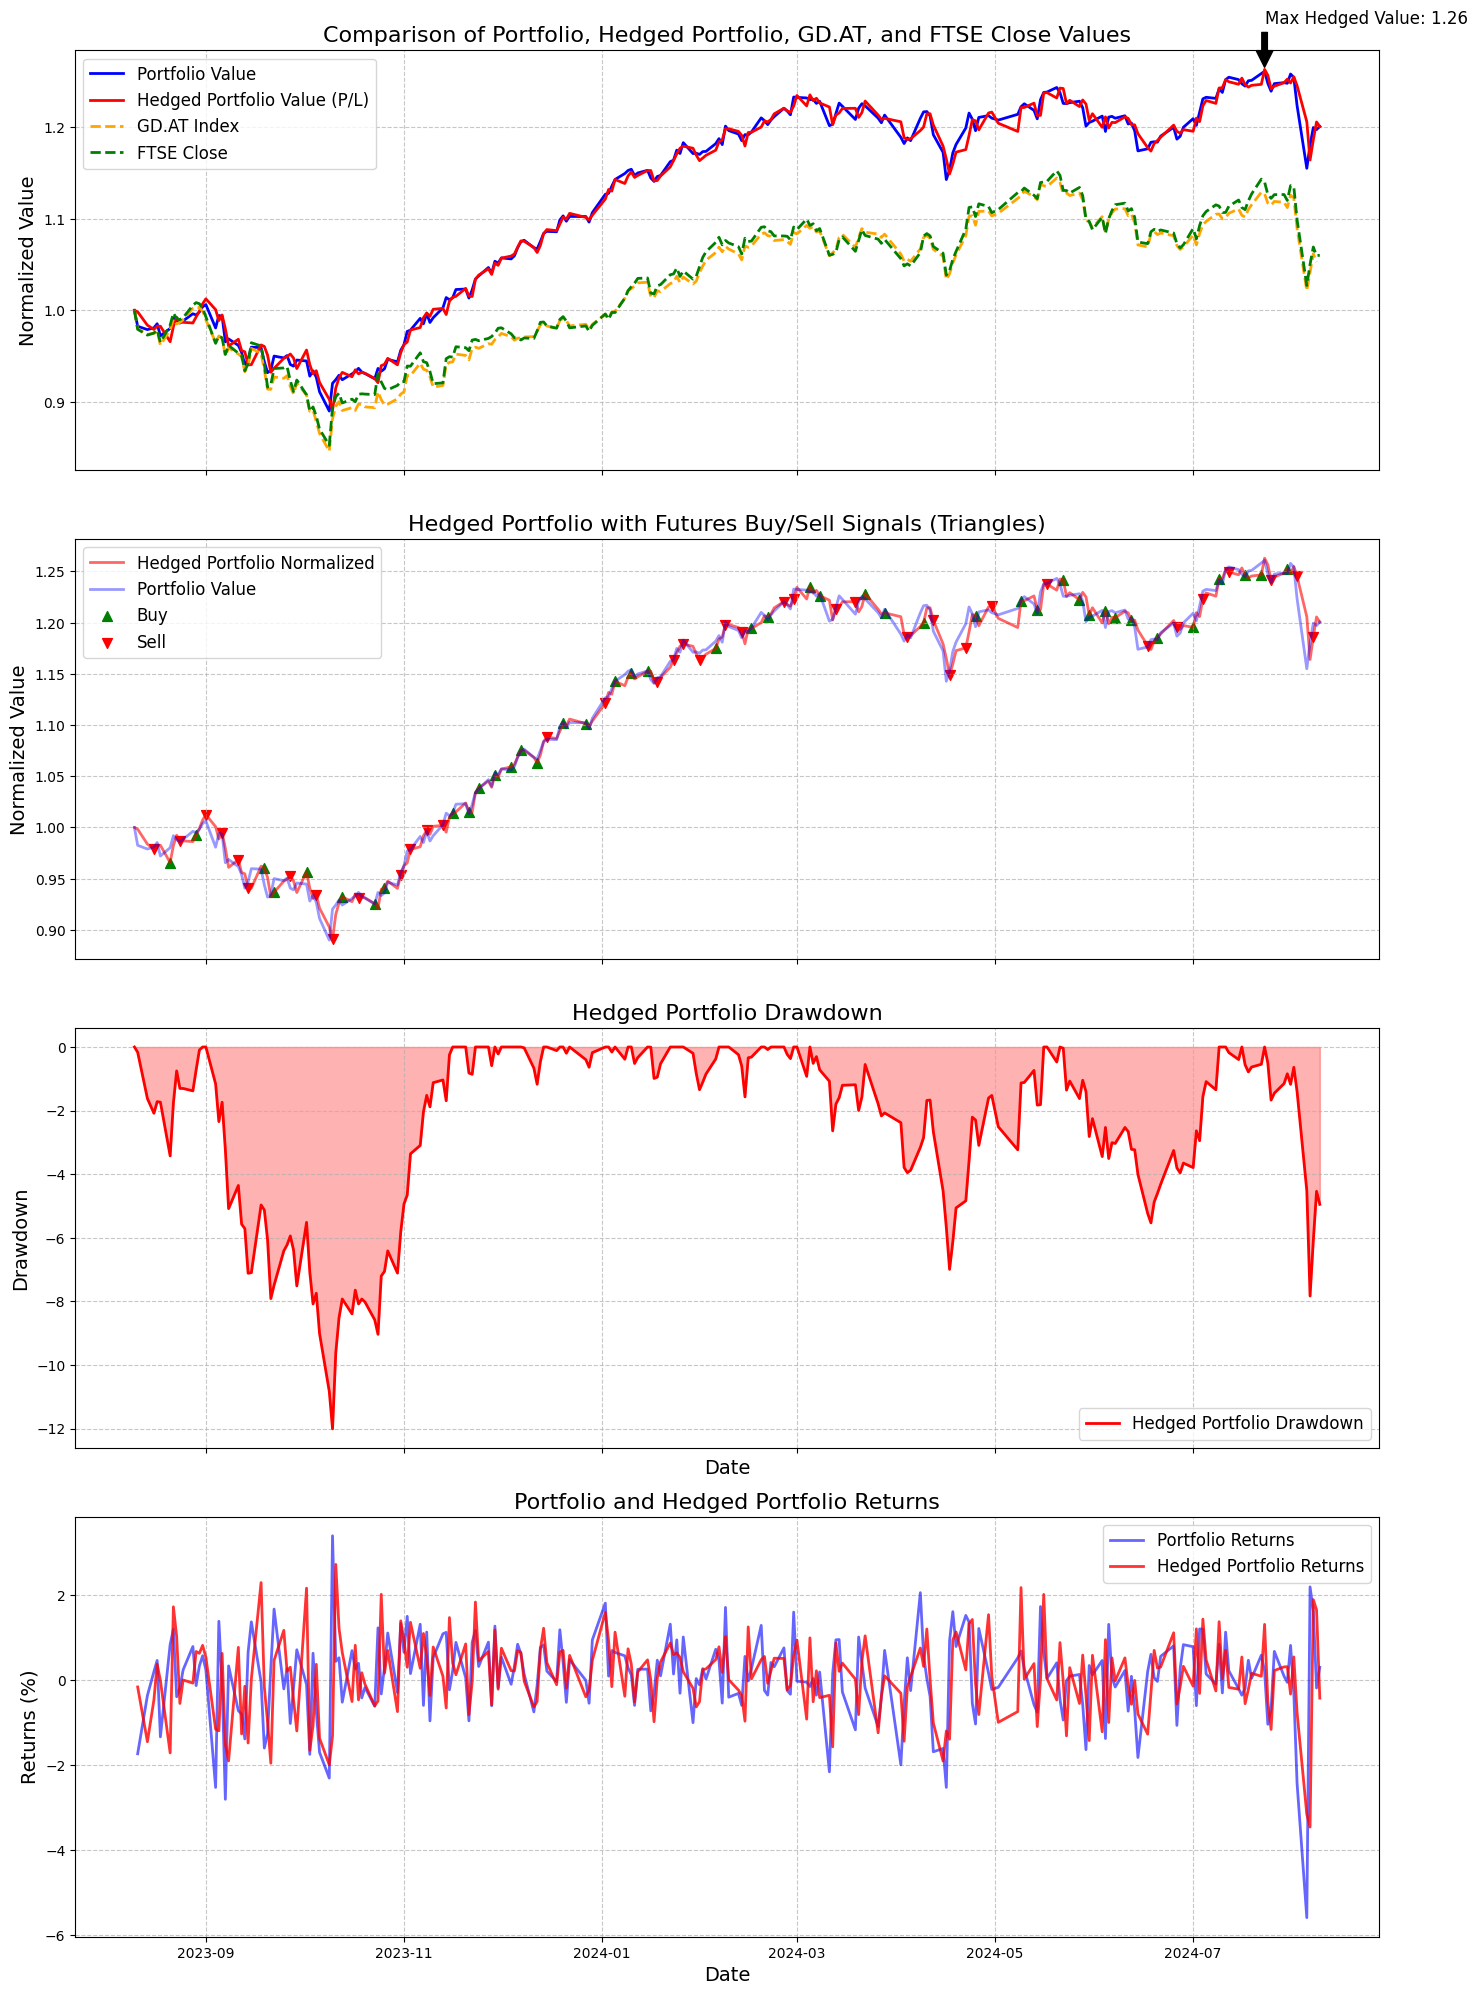

In [ ]:
# Calculate returns for Portfolio and Hedged Portfolio
final_result['Portfolio Returns'] = final_result['Portfolio Value'].pct_change() * 100  # Percentage returns
final_result['Hedged Portfolio Returns'] = final_result['Hedged Portfolio Value'].pct_change() * 100  # Percentage returns


# === First chart: Normalized values for Portfolio, Hedged Portfolio, GD.AT, and FTSE ===
# Download GD.AT data from Yahoo Finance
gd_data = yf.download('GD.AT', start=final_result.index.min(), end=final_result.index.max())
gd_data = gd_data['Close']  # Focus on the closing prices

# Normalize the GD.AT and FTSE values
gd_normalized = gd_data / gd_data.iloc[0]
ftse_normalized = final_result['FTSE Close'] / final_result['FTSE Close'].iloc[0]  # Normalized FTSE index

# Create a new DataFrame to integrate with your existing final_result
final_result['GD.AT Normalized'] = gd_normalized
final_result['FTSE Close Normalized'] = ftse_normalized

# Create a figure with two subplots (2 rows, 1 column)
fig, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1, figsize=(15, 20), sharex=True)

# Normalize existing portfolio values
portfolio_value_normalized = final_result['Portfolio Value'] / final_result['Portfolio Value'].iloc[0]
hedged_portfolio_value_normalized = final_result['Hedged Portfolio Value'] / final_result['Hedged Portfolio Value'].iloc[0]

# Plot normalized portfolio values
ax1.plot(final_result.index, portfolio_value_normalized, label='Portfolio Value', color='blue', linewidth=2)
ax1.plot(final_result.index, hedged_portfolio_value_normalized, label='Hedged Portfolio Value (P/L)', color='red', linewidth=2)

# Plot the normalized GD.AT and FTSE Close
ax1.plot(final_result.index, final_result['GD.AT Normalized'], label='GD.AT Index', color='orange', linewidth=2, linestyle='--')
ax1.plot(final_result.index, final_result['FTSE Close Normalized'], label='FTSE Close', color='green', linewidth=2, linestyle='--')

# Enhance the visualization with grid and style
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_title('Comparison of Portfolio, Hedged Portfolio, GD.AT, and FTSE Close Values', fontsize=16)  # Corrected method

ax1.set_ylabel('Normalized Value', fontsize=14)

# Add a legend to identify each line
ax1.legend(fontsize=12)

# Annotate the maximum point of the hedged portfolio value
max_hedged_value_index = hedged_portfolio_value_normalized.idxmax()
max_hedged_value = hedged_portfolio_value_normalized.max()
ax1.annotate(f'Max Hedged Value: {max_hedged_value:.2f}',
             xy=(max_hedged_value_index, max_hedged_value),
             xytext=(max_hedged_value_index, max_hedged_value + 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

# === Second chart: Futures Buy/Sell Signals ===

contracts = final_result['N']  # Contracts column for buy/sell events

# Detect buy/sell events based on changes in the 'N' column (contracts)
buy_signals = contracts.diff() > 0  # Buy when N increases
sell_signals = contracts.diff() < 0  # Sell when N decreases

# Create the figure and plot the normalized hedged portfolio values
ax2.plot(final_result.index, hedged_portfolio_value_normalized, label='Hedged Portfolio Normalized', color='red',alpha=0.6, linewidth=2)
ax2.plot(final_result.index, portfolio_value_normalized, label='Portfolio Value', color='blue',alpha=0.4,  linewidth=2)

# Add upward triangles (buy signals)
ax2.scatter(final_result.index[buy_signals], hedged_portfolio_value_normalized[buy_signals], color='green', marker='^', s=50, label='Buy')

# Add downward triangles (sell signals)
ax2.scatter(final_result.index[sell_signals], hedged_portfolio_value_normalized[sell_signals], color='red', marker='v', s=50, label='Sell')
ax2.legend(fontsize=12)

# Add labels and grid
ax2.set_title('Hedged Portfolio with Futures Buy/Sell Signals (Triangles)', fontsize=16)
ax2.set_ylabel('Normalized Value', fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.7)

# === Third chart: Drawdown of Hedged Portfolio ===

# Calculate maximum value of the hedged portfolio over time
rolling_max_hedged = final_result['Hedged Portfolio Value'].cummax()

# Calculate the drawdown as a percentage
hedged_drawdown = (final_result['Hedged Portfolio Value'] - rolling_max_hedged) / rolling_max_hedged * 100

# Plot the drawdown for hedged portfolio value
ax3.plot(final_result.index, hedged_drawdown, label="Hedged Portfolio Drawdown", color='red', linewidth=2)
ax3.fill_between(final_result.index, hedged_drawdown, 0, color='red', alpha=0.3)

# Customize the second chart (drawdown)
ax3.grid(True, linestyle='--', alpha=0.7)
ax3.set_title('Hedged Portfolio Drawdown', fontsize=16)
ax3.set_xlabel('Date', fontsize=14)
ax3.set_ylabel('Drawdown', fontsize=14)

# Add legend for the drawdown chart
ax3.legend(fontsize=12)

# Plot the portfolio returns and hedged portfolio returns
ax4.plot(final_result.index, final_result['Portfolio Returns'], label='Portfolio Returns', color='blue', linewidth=2, alpha=0.6)
ax4.plot(final_result.index, final_result['Hedged Portfolio Returns'], label='Hedged Portfolio Returns', color='red', linewidth=2,alpha=0.8)

# Add labels and grid
ax4.set_title('Portfolio and Hedged Portfolio Returns', fontsize=16)
ax4.set_xlabel('Date', fontsize=14)
ax4.set_ylabel('Returns (%)', fontsize=14)
ax4.grid(True, linestyle='--', alpha=0.7)

# Show legend for the returns subplot
ax4.legend(fontsize=12)

# Improve layout for better fit and visibility
plt.tight_layout()

# Show the plot with both subplots
plt.show()

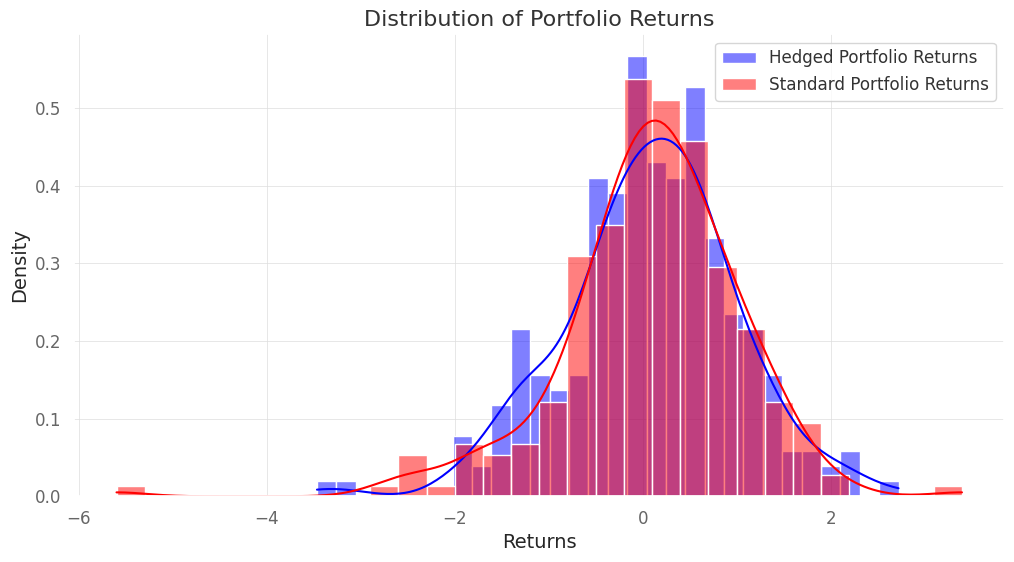

In [ ]:
# Plot the distributions of returns for two different portfolios.
plt.figure(figsize=(12, 6))

# Plotting histograms
sns.histplot(final_result['Hedged Portfolio Returns'], bins=30, kde=True, label='Hedged Portfolio Returns', color='blue', alpha=0.5, stat='density')
sns.histplot(final_result['Portfolio Returns'], bins=30, kde=True, label='Standard Portfolio Returns', color='red', alpha=0.5, stat='density')

# Add title and labels
plt.title('Distribution of Portfolio Returns', fontsize=16)
plt.xlabel('Returns', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a legend
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()

####Results Table Visualization

In [ ]:
final_result

,Date,beta,N,FTSE_value,FTSE Close,P/L,Margin,Required Margin,Margin Flows,Portfolio Value,Hedged Portfolio Value,Hedged Portfolio Returns,Portfolio Returns,GD.AT Normalized,FTSE Close Normalized
Date,,,,,,,,,,,,,,,
2023-08-10,2023-08-10,0.760004,-11.969588,76000.419040,3174.73,0.000000,7600.041904,7600.041904,-7600.041904,99999.800000,99999.800000,NaN,NaN,1.000000,1.000000
2023-08-11,2023-08-11,0.734280,-11.969588,74427.136418,3109.01,1573.282622,9173.324526,7442.713642,0.000000,98259.648271,99832.930893,-0.166869,-1.740155,0.979942,0.979299
2023-08-14,2023-08-14,0.768197,-11.969588,73947.395338,3088.97,479.741080,9653.065606,7394.739534,0.000000,97898.632337,98378.373417,-1.456992,-0.367410,0.973858,0.972987
2023-08-16,2023-08-16,0.767318,-12.154282,75265.394066,3096.25,-174.277199,9478.788407,7526.539407,0.000000,98088.974846,97914.697647,-0.471319,0.194428,0.974688,0.975280
2023-08-17,2023-08-17,0.769324,-12.154282,75523.064854,3106.85,-257.670788,9221.117619,7552.306485,0.000000,98538.480604,98280.809816,0.373909,0.458263,0.977330,0.978619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05,2024-08-05,0.781033,-11.156597,72759.088476,3260.81,5082.276361,21308.975292,7275.908848,0.000000,115498.287277,120580.563638,-3.165371,-5.600464,1.021345,1.027114
2024-08-06,2024-08-06,0.790948,-11.156597,74388.844218,3333.85,-1629.755742,19679.219549,7438.884422,0.000000,118029.120726,116399.364984,-3.467556,2.191230,1.041563,1.050121
2024-08-07,2024-08-07,0.793887,-14.027523,95224.439184,3394.20,-1346.601301,18332.618248,9522.443918,0.000000,119947.152841,118600.551540,1.891064,1.625050,1.061750,1.069130


####Metrics

In [ ]:
def calculate_var(returns, confidence_level=0.95):
    """
    Calculate Value at Risk (VaR) for a given set of returns.

    Parameters:
    - returns: A pandas Series or numpy array containing the returns.
    - confidence_level: The confidence level for VaR calculation (default is 0.95).

    Returns:
    - var: The calculated VaR value.
    """
    # Convert to numpy array if it's a pandas Series
    if isinstance(returns, pd.Series):
        returns = returns.to_numpy()

    # Sort the returns
    sorted_returns = np.sort(returns)

    # Calculate the index for the VaR
    index = int((1 - confidence_level) * len(sorted_returns))

    # Calculate VaR
    var = sorted_returns[index]

    return var

In [ ]:
def metrics(df1, df2, risk_free_rate=0.0):
    """
    Calculate and print financial metrics for two portfolios.

    Parameters:
    - df1: DataFrame containing returns for the first portfolio.
    - df2: DataFrame containing returns for the second portfolio.
    - risk_free_rate: Risk-free rate to be used in Sharpe Ratio calculation (default is 0.0).

    The function prints:
    - Sharpe Ratio for each portfolio
    - Mean returns for each portfolio
    - Standard deviation for each portfolio
    - Value at Risk (VaR) for each portfolio
    """

    # Calculate metrics for portfolio 1
    mean1 = df1.mean()
    std1 = df1.std()
    sharpe1 = (mean1 - risk_free_rate) / std1 if std1 != 0 else np.nan
    var1 = calculate_var(df1)  # 5% VaR

    # Calculate metrics for portfolio 2
    mean2 = df2.mean()
    std2 = df2.std()
    sharpe2 = (mean2 - risk_free_rate) / std2 if std2 != 0 else np.nan
    var2 = calculate_var(df2)  # 5% VaR

    # Print results
    print(f"Metrics Comparison:\n")
    print(f"{'Metric':<20}{'Hedged':<15}{'Standard'}")
    print(f"{'-' * 20}{'-' * 15}{'-' * 15}")
    print(f"{'Sharpe Ratio':<20}{sharpe1:<15.4f}{sharpe2:.4f}")
    print(f"{'Mean Return':<20}{mean1:<15.4f}{mean2:.4f}")
    print(f"{'Standard Deviation':<20}{std1:<15.4f}{std2:.4f}")
    print(f"{'VaR (5%)':<20}{var1:<15.4f}{var2:.4f}")


In [ ]:
metrics(final_result['Hedged Portfolio Returns'],final_result['Portfolio Returns'])

Metrics Comparison:

Metric              Hedged         Standard
--------------------------------------------------
Sharpe Ratio        0.0850         0.0810
Mean Return         0.0779         0.0785
Standard Deviation  0.9165         0.9690
VaR (5%)            -1.4453        -1.6933
